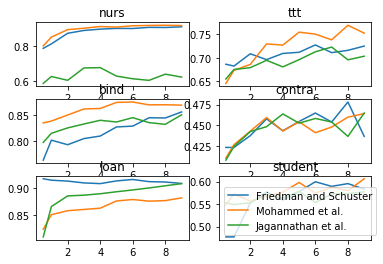

In [15]:
exec(open('GetGraphs.py').read())
plt.show()

In [36]:
#Gini coefficient of each database
ginis = list(map(lambda x: DTrees.get_size_gini(dblist[x]), dblist))

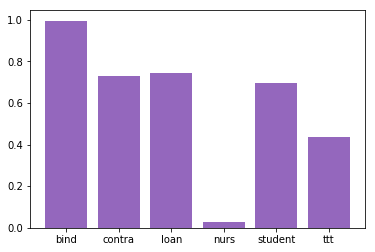

In [39]:
plt.bar(list(dblist.keys()), ginis)
plt.show()

In [ ]:
#The extreme variation in nurs' size explains why Jag does poorly
#Why doesn't Moh do badly (in fact, it does the best?)
#Nurs is a dataset that is very dependent on getting the first attribute
#Let's explore the effects of different heights on nurs

In [110]:
def get_data(args):
    alg, nm, e, p, i = args
    return alglist[alg](dblist[nm], e, p).get_accuracy()

def execute_product(alglist, dblist, eps_vals, params, reps=10):
    l = []
    for a in alglist:
        for nm in dblist:
            for e in eps_vals:
                for p in params:
                    for i in range(0, reps):
                        l.append((a, nm, e, p, i))
    pool = Pool(processes=10)
    res = pool.map(get_data, l)
    data = pd.DataFrame(l)
    data.columns = ['alg', 'database', 'eps', 'params', 'iter']
    data['perf'] = res
    return data
data = execute_product(alglist, ['nurs'], eps_vals, [1,2,3,4,5], 6)

In [111]:
grps = data.groupby(['alg', 'database', 'eps', 'params'])
dgm = grps.mean()
dgs = grps.agg(np.var)

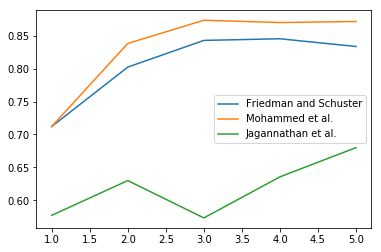

In [123]:
#dgm[dgm.index.get_level_values('params') == 1]
depths = []
for a in alglist:
    depths.append(np.array(dgm['perf'][(dgm.index.get_level_values('alg') == a) &
                                       (dgm.index.get_level_values('eps') == 1)]))
plt.plot([1,2,3,4,5], np.array(depths).T)
plt.legend(list(alglist.keys()))
plt.show()

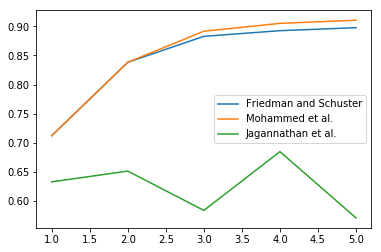

In [124]:
#dgm[dgm.index.get_level_values('params') == 1]
depths = []
for a in alglist:
    depths.append(np.array(dgm['perf'][(dgm.index.get_level_values('alg') == a) &
                                       (dgm.index.get_level_values('eps') == 5)]))
plt.plot([1,2,3,4,5], np.array(depths).T)
plt.legend(list(alglist.keys()))
plt.show()

In [ ]:
#Hypothesis (Still needs testing): The large nodes in nursery benefit much greater from larger depth exploration.
#The low accuracy of Jagannathan is due to the importance of having a feature in the tree (depth 1 shows this fact)
#Furthermore, all the trees trained by Jagannathan are trained to depth 4

In [128]:
k = len(nurs.x_names)
b = sum(map(lambda x: len(np.unique(nurs.train[x])), nurs.x_names))
b = b/k
max_dep = min([np.log(len(nurs.train))/np.log(b)-1, k/2])
max_dep

4.0

In [ ]:
#Why does Mohammed do poorly on loan? It has to be overfitting


In [131]:
def get_data(args):
    alg, nm, e, p, i = args
    return alglist[alg](dblist[nm], e, p).get_accuracy()

def execute_product(alglist, dblist, eps_vals, params, reps=10):
    l = []
    for a in alglist:
        for nm in dblist:
            for e in eps_vals:
                for p in params:
                    for i in range(0, reps):
                        l.append((a, nm, e, p, i))
    pool = Pool(processes=10)
    res = pool.map(get_data, l)
    data = pd.DataFrame(l)
    data.columns = ['alg', 'database', 'eps', 'params', 'iter']
    data['perf'] = res
    return data
data_loan = execute_product(alglist, ['loan'], eps_vals, [1,2,3,4,5], 6)

In [134]:
grps = data_loan.groupby(['alg', 'database', 'eps', 'params'])
dgm = grps.mean()
dgs = grps.agg(np.var)

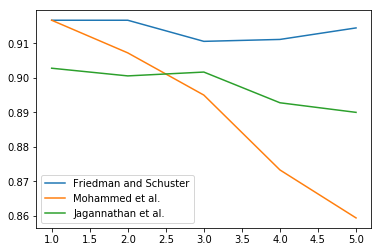

In [139]:
#dgm[dgm.index.get_level_values('params') == 1]
depths = []
for a in alglist:
    depths.append(np.array(dgm['perf'][(dgm.index.get_level_values('alg') == a) &
                                       (dgm.index.get_level_values('eps') == 2)]))
plt.plot([1,2,3,4,5], np.array(depths).T)
plt.legend(list(alglist.keys()))
plt.show()